In [28]:
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

In [29]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from statsmodels.datasets import get_rdataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
US_Arrests = get_rdataset('USArrests').data
US_Arrests

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [31]:
US_Arrests.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [32]:
print(US_Arrests.mean())
print(US_Arrests.var())

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64
Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [33]:
scaler = StandardScaler(with_std=True, with_mean=True)
US_Arrests_scaled = scaler.fit_transform(US_Arrests)

In [34]:
pcaUS = PCA()
pcaUS.fit(US_Arrests_scaled)

,n_components,2
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [35]:
pcaUS.mean_

array([-7.10542736e-17,  1.38777878e-16, -4.39648318e-16,  8.59312621e-16])

In [36]:
scores = pcaUS.transform(US_Arrests_scaled)

In [37]:
pcaUS.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [-0.41818087, -0.1879856 ,  0.87280619,  0.16731864]])

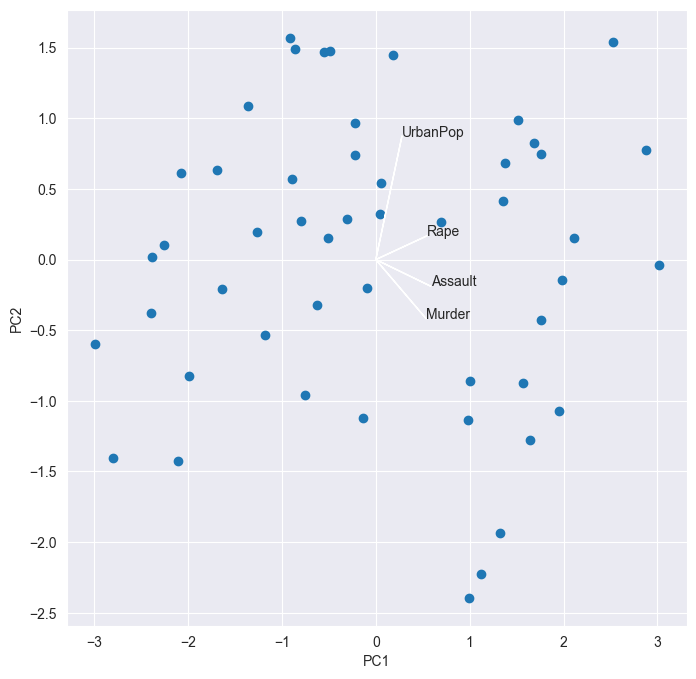

In [38]:
i, j = 0, 1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1])
ax.set_xlabel('PC%d' % (i + 1))
ax.set_ylabel('PC%d' % (j + 1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, pcaUS.components_[i, k], pcaUS.components_[j, k])
    ax.text(pcaUS.components_[i, k], pcaUS.components_[j, k], US_Arrests.columns[k])

IndexError: index 49 is out of bounds for axis 0 with size 2

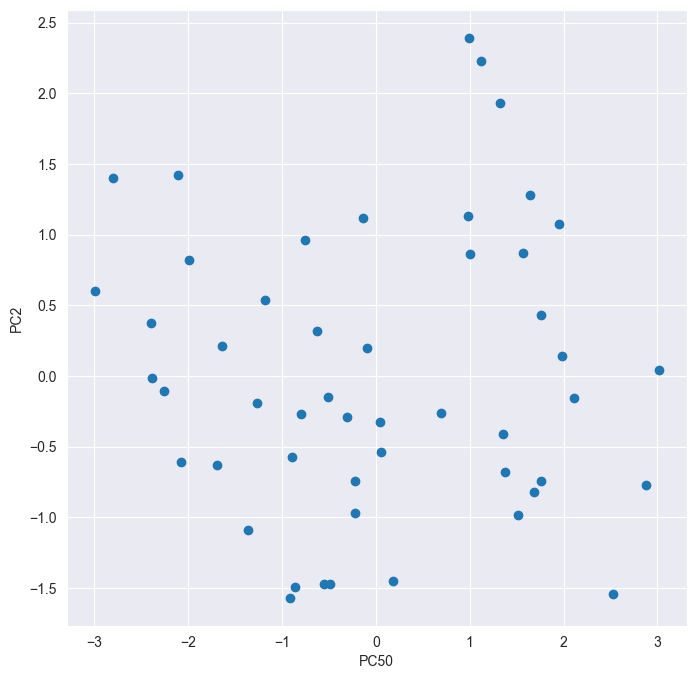

In [42]:
scale_arrows = s_ = 2
scores[:, 1] *= -1
pcaUS.components_[1] *= -1
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(scores[:, 0], scores[:, 1])
ax.set_xlabel('PC%d' % (i + 1))
ax.set_ylabel('PC%d' % (j + 1))
for k in range(pcaUS.components_.shape[1]):
    ax.arrow(0, 0, s_*pcaUS.components_[i, k], s_*pcaUS.components_[j, k])
    ax.text(s_*pcaUS.components_[i, k], s_*pcaUS.components_[j, k], US_Arrests.columns[k])